# WARNING
<h1> <i> <b> If you are running  this notebook in Local env then it may crash due to low computing power, the same may happen if running in google colab without GPU</b></i></h1>


<h2><i><b>
Min requirements:
16 GB RAM
16 GB GPU RAM
</b></i></h2>

In [1]:
# Dataset : Text file version of the book from below
# https://www.gutenberg.org/browse/scores/top
# I have Prepared a dataset by mixing the books from above website :)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding , LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

# This below cell takes a good amount of time and computing power
# so i am uploading both the data_lstm.txt file which has raw data
# and data_redu.text which has the preprocessed data, i.e. output from this cell

In [ ]:
file = open("data_lstm.txt",'r',encoding='utf8')

lines = list()
for i in file:
  lines.append(i)

data = ""
for i in lines:
  data = ' '.join(lines)

data = data.replace('\n','').replace('\r','').replace('\ufeff','').replace('"','')

data = data.split()
data = ' '.join(data)

In [ ]:
# f = open("data_redu.txt",'w')
# f.write(data)
# f.close()

In [2]:
f = open("data_redu.txt",'r')
data = f.read()
f.close()
# data[:819]
print(len(data))


636719


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer,open('token.pkl','wb'))
# tokenizer = pickle.load(open('token.pkl','rb'))
seq_data = tokenizer.texts_to_sequences([data])[0]
seq_data[:15]

[3365, 570, 161, 5, 23, 27, 2204, 2, 156, 23, 16, 6, 275, 80, 1]

In [4]:
len(seq_data)

117578

In [5]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

8459


In [18]:
sequences = list()

for i in range(3,len(seq_data)):
  words = seq_data[i-3:i+1]
  sequences.append(words)

print("The Len of seq are : ",len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Len of seq are :  117575


array([[3365,  570,  161,    5],
       [ 570,  161,    5,   23],
       [ 161,    5,   23,   27],
       [   5,   23,   27, 2204],
       [  23,   27, 2204,    2],
       [  27, 2204,    2,  156],
       [2204,    2,  156,   23],
       [   2,  156,   23,   16],
       [ 156,   23,   16,    6],
       [  23,   16,    6,  275]])

In [9]:
X = []
y = []

for i in sequences:
  X.append(i[0:3])
  y.append(i[3])

X = np.array(X)
y = np.array(y)

In [10]:
print("Data : ", X[:10])
print("Output : ", y[:10])

Data :  [[3365  570  161]
 [ 570  161    5]
 [ 161    5   23]
 [   5   23   27]
 [  23   27 2204]
 [  27 2204    2]
 [2204    2  156]
 [   2  156   23]
 [ 156   23   16]
 [  23   16    6]]
Output :  [   5   23   27 2204    2  156   23   16    6  275]


In [11]:
y = to_categorical(y,num_classes = vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# import torch
# import torchvision
# def get_default_device():
#     """Picking GPU if available or else CPU"""
#     if torch.cuda.is_available():
#         return torch.device('cuda')
#     else:
#         return torch.device('cpu')
# device = get_default_device()

# def to_device(data, device):
#     """Move tensor(s) to chosen device"""
#     if isinstance(data, (list,tuple,str)):
#         return [to_device(x, device) for x in data]
#     return data.to(device, non_blocking=True)

# to_device([data],device)



# Ignore This.
# May need when GPU is not responding in colab or your device :)

In [12]:
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000,activation="relu"))
model.add(Dense(vocab_size,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             84590     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8459)              8467459   
                                                                 
Total params: 21,601,049
Trainable params: 21,601,049
Non-trainable params: 0
_________________________________________________________________


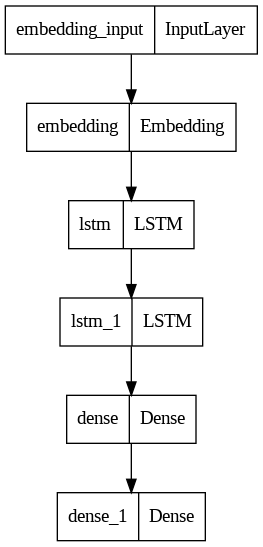

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model,to_file='model.png',show_layer_names=True)

# Model training Will Take 30 to 45 mins with above mentioned specs

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

ckpt = ModelCheckpoint("next_word.h5", monitor = 'loss', verbose = 1, save_best_only = True)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001))
model.fit(X,y,epochs = 100,batch_size = 64,callbacks=[ckpt])

Epoch 1/100
1838/1838 [==============================] - ETA: 0s - loss: 6.4272
Epoch 1: loss improved from inf to 6.42723, saving model to next_word.h5
1838/1838 [==============================] - 50s 22ms/step - loss: 6.4272
Epoch 2/100
1837/1838 [============================>.] - ETA: 0s - loss: 5.8408
Epoch 2: loss improved from 6.42723 to 5.84090, saving model to next_word.h5
1838/1838 [==============================] - 28s 15ms/step - loss: 5.8409
Epoch 3/100
1838/1838 [==============================] - ETA: 0s - loss: 5.4816
Epoch 3: loss improved from 5.84090 to 5.48161, saving model to next_word.h5
1838/1838 [==============================] - 29s 16ms/step - loss: 5.4816
Epoch 4/100
1838/1838 [==============================] - ETA: 0s - loss: 5.2042
Epoch 4: loss improved from 5.48161 to 5.20416, saving model to next_word.h5
1838/1838 [==============================] - 29s 16ms/step - loss: 5.2042
Epoch 5/100
1838/1838 [==============================] - ETA: 0s - loss: 4.9608


In [15]:
from tensorflow.keras.models import load_model
import pickle

model = load_model('next_word.h5')
tokenizer = pickle.load(open('token.pkl','rb'))

def Predict_Next_Word(model,tokenizer,text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key,val in tokenizer.word_index.items():
    if val == preds:
      predicted_word = key
      break
    
  print(predicted_word)
  return predicted_word

# To Test the model
  loss and accuracy are displayed above.
  this model takes quiet a good computing power.
  10 GB RAM
  and 10 GB GPU RAM on colab.
  <br><br>
  TOOK a while to prepare a good model as i have low computing power 😅
  <br>
  <br>

<h2>
<table>
<tr>
<td>Input</td>
<td> Correct Output</td>
</tr>

<tr>
<td></td>
<td></td>
</tr>

<tr>
<td>i have a</td>
<td> fury</td>
</tr>

<tr>
<td>his nose was</td>
<td>        small</td>
</tr>

<tr>
<td>one friend and </td>
<td>     protector</td>
</tr>

<tr>
<td>in her with      </td>
<td>   mournful</td>
</tr>

<tr>
<td>shouts and stories  </td>
<td> began </td>
</tr>

<tr>
<td>flew into a        </td>
<td> passion</td>
</tr>

<tr>
<td>and in its place had been put a large old</td>
<td>mahagony</td>
</tr>

<tr>
<td>Ivan's Nightmare I am not a</td>
<td>                         doctor</td>
</tr>

<tr>
<td>I am more afraid of her than of</td>
<td>anything</td>
</tr>

<tr>
<td>The Speech For The</td>
<td>Defense</td>
</tr>

<tr>
<td>We have heard the prosecutor himself admit that until to-day he   
</td>
<td>
hesitated
</td>
</tr>

<tr>
<td>to bind and to </td>
<td>    loose</td>
</tr>

</table>
</h2>



For predicted output see the below cell

In [17]:
while(True):
  text = input("Enter your line : ")

  if text == "0":
    print("Stopped")
    break
  else:
    try:
      text = text.split(" ")
      text = text[-3:]

      print(text)
      ans = Predict_Next_Word(model,tokenizer,text)
      print("Ans : ",ans)
    except Exception as e:
      print("Error : ",e)
      continue


Enter your line : and in its place had been put a large old
['a', 'large', 'old']
1/1 [==============================] - 0s 27ms/step
mahogany
Ans :  mahogany
Enter your line : Ivan’s Nightmare I am not a
['am', 'not', 'a']
1/1 [==============================] - 0s 18ms/step
thief
Ans :  thief
Enter your line : I am more afraid of her than of
['her', 'than', 'of']
1/1 [==============================] - 0s 23ms/step
anything
Ans :  anything
Enter your line :  The Speech For The
['Speech', 'For', 'The']
1/1 [==============================] - 0s 18ms/step
defense
Ans :  defense
Enter your line : flew into a
['flew', 'into', 'a']
1/1 [==============================] - 0s 19ms/step
fury
Ans :  fury
Enter your line : shouts and stories
['shouts', 'and', 'stories']
1/1 [==============================] - 0s 28ms/step
began
Ans :  began
Enter your line : in her with
['in', 'her', 'with']
1/1 [==============================] - 0s 18ms/step
mournful
Ans :  mournful
Enter your line : one friend an

'\ntest lines \ninput               output\n\ni have a            fury\n\nhis nose was        small\n\nhis one friend      and \none friend and      protector\nin her with         mournful\nshouts and stories  began  \nflew into a         passion\n\n\n\n'

In [22]:
while(True):
  text = input("Enter your line : ")

  if text == "stop":
    print("Stopped")
    break
  else:
    try:
      text = text.split(" ")
      text = text[-3:]

      print(text)
      ans = Predict_Next_Word(model,tokenizer,text)
      print("Ans : ",ans)
    except Exception as e:
      print("Error : ",e)
      continue


Enter your line : Nisarg is a
['Nisarg', 'is', 'a']
1/1 [==============================] - 0s 20ms/step
charming
Ans :  charming
Enter your line : this boy is
['this', 'boy', 'is']
1/1 [==============================] - 0s 20ms/step
called
Ans :  called
Enter your line : naruto is legend
['naruto', 'is', 'legend']
1/1 [==============================] - 0s 21ms/step
i
Ans :  i
Enter your line : my self
['my', 'self']
1/1 [==============================] - 0s 22ms/step
head
Ans :  head
Enter your line : why i love
['why', 'i', 'love']
1/1 [==============================] - 0s 21ms/step
you
Ans :  you
Enter your line : this is why i love
['why', 'i', 'love']
1/1 [==============================] - 0s 20ms/step
you
Ans :  you
Enter your line : hate is the reason
['is', 'the', 'reason']
1/1 [==============================] - 0s 22ms/step
he
Ans :  he
Enter your line : he is the
['he', 'is', 'the']
1/1 [==============================] - 0s 21ms/step
third
Ans :  third
Enter your line : detect